In [84]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, 'scripts/')
from gen_matrix import matrix_gen, get_ICA
from get_sample import get_sample, create_strings_for_dataset
from fft import fft_for_sample
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
EEG = matrix_gen()
ICA = get_ICA()

class_ = 20000//3
class1 = [0,class_]
class2 = [class_,class_*2]
class3 = [class_*2, EEG.shape[1]]

print(class1, class2, class3)

[0, 6666] [6666, 13332] [13332, 19998]


In [3]:
#Перемножаем ICA и EEG матрицы
matrix = np.matmul(ICA, EEG)
#Разбиваем на матрицы классов, чтоб проще было делить на семплы
matrix_class1 = matrix[:,0:class_]
matrix_calss2 = matrix[:, class_:class_*2]
matrix_calss3 = matrix[:, class_*2:EEG.shape[1]]

In [4]:
#Получаю семплы для каждого класса
sample_calss1 = get_sample(matrix_class1)
sample_calss2 = get_sample(matrix_calss2)
sample_calss3 = get_sample(matrix_calss3)

In [5]:
print(len(sample_calss1), len(sample_calss2), len(sample_calss3))

34 34 34


In [6]:
#Преобразование Фурье
sample_calss1_fft = fft_for_sample(sample_calss1, first_n_elements=20)
sample_calss2_fft = fft_for_sample(sample_calss2, first_n_elements=20)
sample_calss3_fft = fft_for_sample(sample_calss3, first_n_elements=20)

In [7]:
#Создание строк для датасета, из матрицы 128*20 -> в вектор 2560
sample_calss1_fft_str = create_strings_for_dataset(sample_calss1_fft)
sample_calss2_fft_str = create_strings_for_dataset(sample_calss2_fft)
sample_calss3_fft_str = create_strings_for_dataset(sample_calss3_fft)

In [24]:
#Создание таблицы объекты-признаки

#Класс 1
data_class_1 = pd.DataFrame(data=np.zeros((34, 2560)))
data_class_1['label'] = 1

for i in tqdm(range(len(sample_calss1_fft_str))):
    data_class_1.loc[i, :-1] = sample_calss1_fft_str[i]
    
    
#Класс 2
data_class_2 = pd.DataFrame(data=np.zeros((34, 2560)))
data_class_2['label'] = 2

for i in tqdm(range(len(sample_calss2_fft_str))):
    data_class_2.loc[i, :-1] = sample_calss2_fft_str[i]
    
    
#Класс 3
data_class_3 = pd.DataFrame(data=np.zeros((34, 2560)))
data_class_3['label'] = 3V0

for i in tqdm(range(len(sample_calss3_fft_str))):
    data_class_3.loc[i, :-1] = sample_calss3_fft_str[i]
    
    
data = pd.concat([data_class_1, data_class_2, data_class_3], axis=0)
print(data.shape)
data.head(5)

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


HBox(children=(IntProgress(value=0, max=34), HTML(value='')))

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


HBox(children=(IntProgress(value=0, max=34), HTML(value='')))

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


HBox(children=(IntProgress(value=0, max=34), HTML(value='')))


(102, 2561)


,0,1,2,3,4,5,6,7,8,9,...,2551,2552,2553,2554,2555,2556,2557,2558,2559,label
0,378.621793+0.000000j,392.359895+0.000000j,376.212969+0.000000j,407.818167+0.000000j,387.736533+0.000000j,399.956532+0.000000j,401.222270+0.000000j,394.667790+0.000000j,397.796120+0.000000j,401.077424+0.000000j,...,-0.239623-0.222756j,-0.286905-0.320460j,-0.357968-0.314217j,-0.215491-0.259454j,-0.341680-0.276433j,-0.305196-0.238052j,-0.308881-0.279752j,-0.341940-0.260021j,-0.235208-0.317992j,1
1,378.498136+0.000000j,392.292583+0.000000j,376.181943+0.000000j,407.746909+0.000000j,387.746698+0.000000j,399.882975+0.000000j,401.149658+0.000000j,394.616038+0.000000j,397.777711+0.000000j,401.057028+0.000000j,...,-0.520837-0.071549j,-0.612741-0.155405j,-0.633815-0.140458j,-0.542515-0.176187j,-0.635357-0.088674j,-0.575131-0.060048j,-0.596054-0.129106j,-0.617545-0.078515j,-0.515092-0.124903j,1
2,378.494679+0.000000j,392.321874+0.000000j,376.239557+0.000000j,407.815894+0.000000j,387.770623+0.000000j,399.915903+0.000000j,401.181507+0.000000j,394.723796+0.000000j,397.823791+0.000000j,401.101859+0.000000j,...,-0.472840+0.187818j,-0.537317+0.141913j,-0.575548+0.159495j,-0.538792+0.112142j,-0.508322+0.181164j,-0.476061+0.195841j,-0.551516+0.158773j,-0.463980+0.163623j,-0.432593+0.093382j,1
3,379.023669+0.000000j,392.874435+0.000000j,376.668883+0.000000j,408.260964+0.000000j,388.297122+0.000000j,400.346737+0.000000j,401.753792+0.000000j,395.208318+0.000000j,398.306172+0.000000j,401.608149+0.000000j,...,0.064540-0.036186j,0.019709-0.039423j,-0.007076-0.032071j,-0.066462-0.034094j,-0.025900-0.014831j,0.017568-0.016562j,0.035882-0.030549j,0.037953-0.053292j,0.015461-0.065619j,1
4,378.942847+0.000000j,392.705636+0.000000j,376.561026+0.000000j,408.035356+0.000000j,388.169465+0.000000j,400.223592+0.000000j,401.592606+0.000000j,395.093402+0.000000j,398.165688+0.000000j,401.492231+0.000000j,...,-0.150503-0.318108j,-0.173673-0.301851j,-0.145987-0.272791j,-0.186571-0.280399j,-0.153269-0.185514j,-0.123856-0.246385j,-0.160488-0.309019j,-0.164026-0.314761j,-0.135274-0.287606j,1


In [75]:
#Понизим размерность до 60 компонент
PCA = PCA(n_components=60)
data_pca = PCA.fit_transform(abs(data).iloc[:, :-1])

In [76]:
data_pca = pd.DataFrame(data_pca)
# data_pca['label'] = data['label'].values
labels = data['label'].values

In [82]:
#Обучим LDA
LDA = LDA()
LDA.fit(data_pca, labels)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [85]:
#Посмотрим важные признаки с помощью RF
rf = RandomForestClassifier()
rf.fit(data_pca, labels)

/Users/aleksandrbojko/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

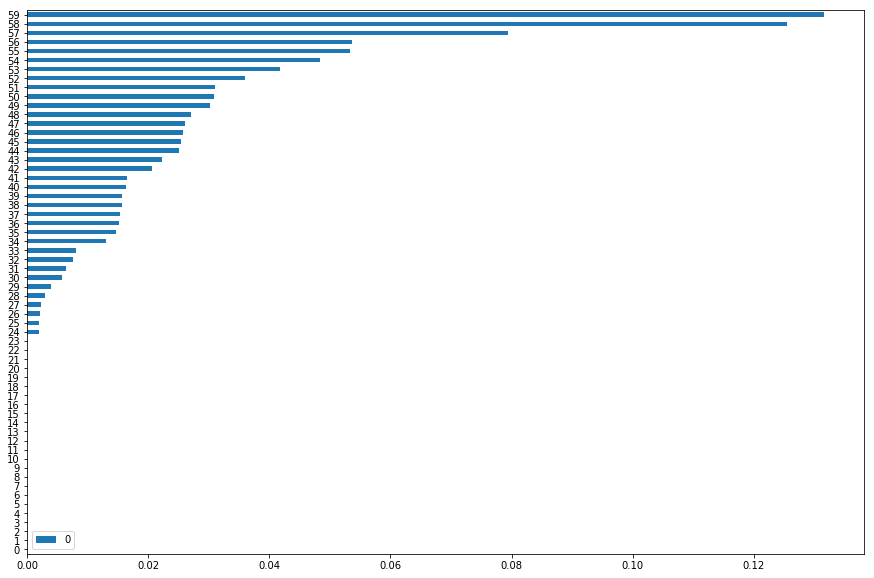

In [101]:
pd.DataFrame(sorted(rf.feature_importances_)).plot(kind='barh', figsize=(15,10))